In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [63]:
from google.colab import drive
drive.mount('/content/drive')


drive_path = "/content/drive/MyDrive/주피터_대피소/인턴/"


#df=pd.read_csv('dataset1.CSV', engine='python', encoding = 'utf-8')
#df.head()
#data['EDEC_JBRDN_AMT'].value_counts().head(50)
#data['EDEC_SBRDN_AMT'].value_counts().head(50)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(1048575, 19)


In [95]:
df = pd.read_csv(drive_path + "dataset1.csv")

print(df.shape)

(1048575, 19)


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   STND_Y           1048575 non-null  int64  
 1   IDV_ID           1048575 non-null  int64  
 2   KEY_SEQ          1048575 non-null  int64  
 3   SEX              1048575 non-null  int64  
 4   AGE_GROUP        1048575 non-null  int64  
 5   SIDO             1048575 non-null  int64  
 6   RECU_FR_DT       1048575 non-null  object 
 7   FORM_CD          1048575 non-null  int64  
 8   DSBJT_CD         1048575 non-null  int64  
 9   MAIN_SICK        1048575 non-null  object 
 10  SUB_SICK         1048575 non-null  object 
 11  VSCN             1048575 non-null  int64  
 12  RECN             1048575 non-null  int64  
 13  EDEC_ADD_RT      1048575 non-null  float64
 14  EDEC_TRAMT       1048575 non-null  int64  
 15  EDEC_SBRDN_AMT   1048575 non-null  int64  
 16  EDEC_JBRDN_AMT   1

# date and season processing

In [97]:
import datetime

#df=df[ ['SEX','AGE_GROUP','RECU_FR_DT','MAIN_SICK','SUB_SICK'] ]

df['RECU_FR_DT']=pd.to_datetime(df['RECU_FR_DT'])
df['month']=df['RECU_FR_DT'].dt.month
df['month'].value_counts()

df['MAIN_SICK'].value_counts().head(3)



I109    141027
J209     87358
E119     26401
Name: MAIN_SICK, dtype: int64

In [98]:
def season(x) :
    if x>=3 and x<= 5 :
        return 1
    elif x>=6 and x<= 8 :
        return 2
    elif x>=9 and x<=11 :
        return 3
    else :
        return 4

df['season']=df['month'].apply(season)

df['season'].value_counts()

df

,STND_Y,IDV_ID,KEY_SEQ,SEX,AGE_GROUP,SIDO,RECU_FR_DT,FORM_CD,DSBJT_CD,MAIN_SICK,...,VSCN,RECN,EDEC_ADD_RT,EDEC_TRAMT,EDEC_SBRDN_AMT,EDEC_JBRDN_AMT,TOT_PRES_DD_CNT,DATA_STD_DT,month,season
0,2020,29,3724043,1,17,41,2020-12-21,3,1,I109,...,1,1,0.15,11540,1500,10040,0,2021-12-28,12,4
1,2020,29,3495225,1,17,41,2020-12-14,3,1,I109,...,1,1,0.15,11540,1500,10040,7,2021-12-28,12,4
2,2020,255,10615350,2,18,41,2020-04-20,3,1,I109,...,1,1,0.15,11540,1500,10040,30,2021-12-28,4,1
3,2020,255,10616553,2,18,41,2020-04-16,3,1,I109,...,1,1,0.15,11540,1500,10040,30,2021-12-28,4,1
4,2020,2406,3105303,2,17,41,2020-12-30,3,1,I109,...,1,1,0.15,11540,1500,10040,0,2021-12-28,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2020,331155,10313767,1,15,44,2020-06-25,3,13,J029,...,1,1,0.15,16140,1600,14540,0,2021-12-28,6,2
1048571,2020,331155,10313766,1,15,44,2020-06-24,3,13,J029,...,1,1,0.15,16140,1600,14540,0,2021-12-28,6,2
1048572,2020,331415,7469843,2,16,41,2020-08-27,3,15,N3940,...,1,1,0.15,16140,1600,14540,7,2021-12-28,8,2
1048573,2020,331726,10904243,1,16,41,2020-05-08,3,15,N400,...,1,1,0.15,16140,1600,14540,0,2021-12-28,5,1


In [99]:
#df=df[~df['MAIN_SICK'].str.contains('I109')]

df['MAIN_SICK'].value_counts().head(50)
##추가로 DSBJT_CD
df=df[['SEX','AGE_GROUP','season','MAIN_SICK','SUB_SICK','DSBJT_CD']]
df.head()

df.rename(columns={'SEX':'sex','AGE_GROUP':'age','season':'season','MAIN_SICK':'main','SUB_SICK':'sub', 'DSBJT_CD' : 'dsb'}, inplace=True)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,sex,age,season,main,sub,dsb
0,1,17,4,I109,E785,1
1,1,17,4,I109,E785,1
2,2,18,1,I109,I251,1
3,2,18,1,I109,I251,1
4,2,17,4,I109,E780,1
...,...,...,...,...,...,...
1048570,1,15,2,J029,J040,13
1048571,1,15,2,J029,J040,13
1048572,2,16,2,N3940,N319,15
1048573,1,16,1,N400,N319,15


In [125]:
##상위 30개 질병에 대해서만

df30=df[df['main'].str.contains('I109|J209|E119|J304|K210|L239|K219|J029|J0390|N400|J060|B351|J00|J303|N_|K297|F_|M170|M5456|M4806')]

#상위 10개 질병에 대해서만
df10=df[df['main'].str.contains('I109|J209|E119|J304|K210|L239|K219|J029|J0390|N400')]

In [6]:
#sns.pairplot(df, hue = 'main')

# RF

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [126]:
seed=42

test=df10[['sex','age','season','main','dsb']]
test

,sex,age,season,main,dsb
0,1,17,4,I109,1
1,1,17,4,I109,1
2,2,18,1,I109,1
3,2,18,1,I109,1
4,2,17,4,I109,1
...,...,...,...,...,...
1048569,2,15,4,J029,13
1048570,1,15,2,J029,13
1048571,1,15,2,J029,13
1048573,1,16,1,N400,15


In [127]:
## 모델링 적용을 위한 feature 및 label 분류 in dai
feature = [
    'sex',
    'age',
    'season',
    'dsb'
]

In [128]:
label = ['main']

In [129]:
test['sex']= test['sex'].astype('category').cat.codes
test['sex'].value_counts()

test['age']= test['age'].astype('category').cat.codes
test['season']=test['season'].astype('category').cat.codes
test['main']=test['main'].astype('category').cat.codes
print(test.info())


test['main'].value_counts().head(50)


#df1=df.iloc[:5000]

test1=test.iloc[:50000]

test1['main'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379564 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   sex     379564 non-null  int8 
 1   age     379564 non-null  int8 
 2   season  379564 non-null  int8 
 3   main    379564 non-null  int8 
 4   dsb     379564 non-null  int64
dtypes: int64(1), int8(4)
memory usage: 7.2 MB
None


1    24713
4     6002
9     5892
6     4221
7     3146
0     1687
8     1500
5     1367
2      886
3      586
Name: main, dtype: int64

In [130]:
x=test1[feature]
y=test1[label]

y.value_counts()

main
1       24713
4        6002
9        5892
6        4221
7        3146
0        1687
8        1500
5        1367
2         886
3         586
dtype: int64

In [131]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=seed)
print(x_train)


        sex  age  season  dsb
121488    1   15       1    1
34710     0   13       1    1
38091     1   13       3    1
45350     1   14       0    1
5847      0   15       0    1
...     ...  ...     ...  ...
14610     1   14       3    1
125792    0   13       3    1
118549    1   14       0    1
860       0   15       3    1
28295     0   13       3    1

[45000 rows x 4 columns]


In [14]:
#from sklearn.preprocessing import OneHotEncoder
#oneh = OneHotEncoder(handle_unknown="ignore")
#oneh.fit(train[feature])
#x_test = oneh.transform(train[feature])
#x_train

#x_test

In [132]:
# instantiate the classifier 
rfc = RandomForestClassifier(n_estimators=100, random_state=0,oob_score=True)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [133]:
estimator = rfc.estimators_[0]
estimator

DecisionTreeClassifier(max_features='auto', random_state=209652396)

In [134]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

print("train accuracy : {:.3f}".format(rfc.score(x_train,y_train)))

print("test accuracy : {:.3f}".format(rfc.score(x_test,y_test)))




Model accuracy score with 10 decision-trees : 0.6482
train accuracy : 0.645
test accuracy : 0.648


In [135]:
predicted = rfc.predict(x_test)
accuracy = accuracy_score(y_test, predicted)

print(f'Out-of-bag score estimate: {rfc.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')



Out-of-bag score estimate: 0.642
Mean accuracy score: 0.648


In [139]:

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = None,
                class_names = None,
                rounded = True, proportion = True, 
                precision = 3, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

Output hidden; open in https://colab.research.google.com to view.

In [20]:
from sklearn.metrics import confusion_matrix, classification_report


#print(classification_report(y_test, y_pred))
#confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           5       0.00      0.00      0.00        23
          17       0.00      0.00      0.00        30
          18       0.00      0.00      0.00        39
          29       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         2
          40       0.00      0.00      0.00         4
          41       0.00      0.00      0.00         1
          51       0.00      0.00      0.00         2
          53       0.00      0.00      0.00         7
          57       0.00      0.00      0.00         6
          83       0.00      0.00      0.00        68
          85       0.00      0.00      0.00        22
          86       0.00      0.00      0.00         9
          88       0.00      0.00      0.00         5
          90       0.00      0.00      0.00         1
          91       0.00      0.00      0.00         1
          95       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 
print("Feature importances:\n{0}".format(np.round(rfc.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(df1[feature], rfc.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기 
#sns.barplot(x=df1[feature], y=rfc.feature_importances_ )


Feature importances:
[0.308 0.397 0.295]
sex : 0.308
age : 0.397
season : 0.295


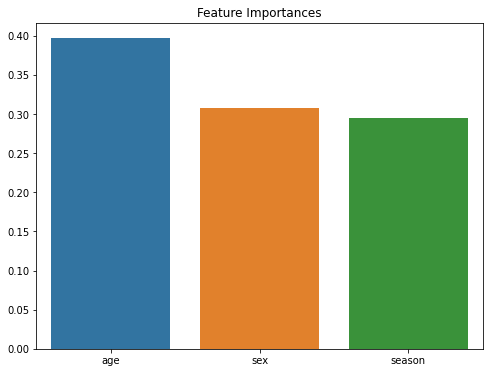

In [22]:
ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr= ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr.index, y=ftr)
plt.show()

In [23]:
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
rfc_100.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(random_state=0)

In [24]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


TypeError: ignored

In [29]:
y_pred_100 = rfc_100.predict(x_test)

In [30]:
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.1016


In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test, y_pred_100))

              precision    recall  f1-score   support

           5       0.00      0.00      0.00        23
          17       0.00      0.00      0.00        30
          18       0.00      0.00      0.00        39
          29       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         2
          40       0.00      0.00      0.00         4
          41       0.00      0.00      0.00         1
          51       0.00      0.00      0.00         2
          53       0.00      0.00      0.00         7
          57       0.00      0.00      0.00         6
          83       0.00      0.00      0.00        68
          85       0.00      0.00      0.00        22
          86       0.00      0.00      0.00         9
          88       0.00      0.00      0.00         5
          90       0.00      0.00      0.00         1
          91       0.00      0.00      0.00         1
          95       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)
feature_scores = pd.Series(clf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_scores[:10]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


age       0.396955
sex       0.307793
season    0.295252
dtype: float64

In [34]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=5)            # Desired number of Cross Validation folds  #n_splits값이 클수록 오래걸림
accuracies = list()
max_attributes = x_test.shape[1]
depth_range = range(1, max_attributes)

# Testing max_depths from 1 to max attributes
# Uncomment prints for details about each Cross Validation pass
for depth in depth_range:
    fold_accuracy = []
    rand_clf = RandomForestClassifier(max_depth = depth)
    # print("Current max depth: ", depth, "\n")
    for train_fold, valid_fold in cv.split(train):
        f_train = train.loc[train_fold] # Extract train data with cv indices
        f_valid = train.loc[valid_fold] # Extract valid data with cv indices

        model = rand_clf.fit(x_train, y_train)
        valid_acc = model.score(x_test, y_test)
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    # print("Accuracy per fold: ", fold_accuracy, "\n")
    # print("Average accuracy: ", avg)
    # print("\n")
    
# Just to show results conveniently
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

NameError: ignored

In [ ]:
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

In [ ]:
gdb=GradientBoostingClassifier(random_state=seed)
gdb.fit(x_train, y_train)

In [ ]:
##다시
#print(dai_rf_test)

#y_pred=gdb.predict(dai_rf_test)


In [ ]:
print("Feature importances:\n{0}".format(np.round(rand_clf.feature_importances_, 3)))